In [1]:
import os

import SimpleITK as sitk
import numpy as np
import matplotlib

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed
from IPython.display import clear_output

# Callback invoked by the interact IPython method for scrolling through the image stacks of
# the two images (moving and fixed).
def display_image_slice(image_z, image_npa):
    # Create a figure with two subplots and the specified size.
    plt.figure(figsize=(10,8))
    
    # Draw the fixed image in the first subplot.
    plt.imshow(image_npa[image_z,:,:],cmap=plt.cm.Greys_r);
    plt.title('slice')
    plt.axis('off')
    
    plt.show()
    
def isotropic_resample(image):
    new_spacing = [1, 1, 1]

    resampler = sitk.ResampleImageFilter()
    resampler.SetInterpolator(sitk.sitkNearestNeighbor)
    resampler.SetOutputDirection(raw_img.GetDirection())
    resampler.SetOutputOrigin(raw_img.GetOrigin())
    resampler.SetOutputSpacing(new_spacing)

    orig_size = np.array(image.GetSize(), dtype=np.int)
    orig_spacing = image.GetSpacing()
    new_size = np.array([x * (y / z) for x, y, z in zip(orig_size, orig_spacing, new_spacing)])
    new_size = np.ceil(new_size).astype(np.int)  # Image dimensions are in integers
    new_size = [int(s) for s in new_size]
    resampler.SetSize(new_size)

    isotropic_img = resampler.Execute(image)
    return isotropic_img

In [3]:
PATH = "../Data/xVertSeg/Data1/"
PATH = os.path.abspath(PATH)

PATH_IMG = os.path.join(PATH, 'images')
PATH_MASK = os.path.join(PATH, 'masks')

print(f'general path: {PATH}\n\nimage path: {PATH_IMG}\nmask path: {PATH_MASK}')

general path: /home/jan/Documents/Projects/MastatThesis/Data/xVertSeg/Data1

image path: /home/jan/Documents/Projects/MastatThesis/Data/xVertSeg/Data1/images
mask path: /home/jan/Documents/Projects/MastatThesis/Data/xVertSeg/Data1/masks


In [4]:
image_name = os.path.join(PATH_IMG, 'image001.mhd')
mask_name = os.path.join(PATH_MASK, 'mask001.mhd')

In [5]:
raw_img = sitk.ReadImage(image_name)
raw_mask = sitk.ReadImage(mask_name)

print(f'Raw image dimensions : {raw_img.GetSize()}\nRaw mask dimensions : {raw_mask.GetSize()}')
print(f'Raw image spacing : {raw_img.GetSpacing()}\nRaw mask spacing : {raw_mask.GetSpacing()}')

interact(display_image_slice, 
         image_z=(0,raw_img.GetSize()[2]-1), 
         image_npa = fixed(sitk.GetArrayViewFromImage(raw_img)))

interact(display_image_slice, 
         image_z=(0,raw_mask.GetSize()[2]-1), 
         image_npa = fixed(sitk.GetArrayViewFromImage(raw_mask)))

Raw image dimensions : (1024, 1024, 200)
Raw mask dimensions : (1024, 1024, 200)
Raw image spacing : (0.41362, 0.41362, 1.4506)
Raw mask spacing : (0.41362, 0.41362, 1.4506)


interactive(children=(IntSlider(value=99, description='image_z', max=199), Output()), _dom_classes=('widget-in…

interactive(children=(IntSlider(value=99, description='image_z', max=199), Output()), _dom_classes=('widget-in…

<function __main__.display_image_slice(image_z, image_npa)>

In [6]:
isotropic_img = isotropic_resample(raw_img)
isotropic_mask = isotropic_resample(raw_mask)

In [9]:
print(f'Isotropic image dimensions : {isotropic_img.GetSize()}\nIsotropic mask dimensions : {isotropic_mask.GetSize()}')
print(f'Raw image spacing : {isotropic_img.GetSpacing()}\nRaw mask spacing : {isotropic_img.GetSpacing()}')

interact(display_image_slice, 
         image_z=(0,isotropic_img.GetSize()[2]-1), 
         image_npa = fixed(sitk.GetArrayViewFromImage(isotropic_img)))

interact(display_image_slice, 
         image_z=(0,isotropic_mask.GetSize()[2]-1), 
         image_npa = fixed(sitk.GetArrayViewFromImage(isotropic_mask)))

Isotropic image dimensions : (424, 424, 291)
Isotropic mask dimensions : (424, 424, 291)
Raw image spacing : (1.0, 1.0, 1.0)
Raw mask spacing : (1.0, 1.0, 1.0)


interactive(children=(IntSlider(value=145, description='image_z', max=290), Output()), _dom_classes=('widget-i…

interactive(children=(IntSlider(value=145, description='image_z', max=290), Output()), _dom_classes=('widget-i…

<function __main__.display_image_slice(image_z, image_npa)>

In [11]:
img = sitk.GetArrayFromImage(isotropic_img)
print(img.shape)
img_reconstruct = sitk.GetImageFromArray(img)

interact(display_image_slice, 
         image_z=(0,img_reconstruct.GetSize()[2]-1), 
         image_npa = fixed(sitk.GetArrayViewFromImage(img_reconstruct)))

(291, 424, 424)


interactive(children=(IntSlider(value=145, description='image_z', max=290), Output()), _dom_classes=('widget-i…

<function __main__.display_image_slice(image_z, image_npa)>

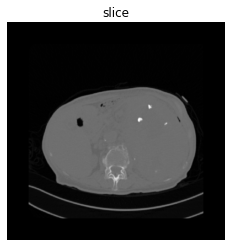

In [12]:
for i in [50, 100, 150]:
    plt.imshow(sitk.GetArrayViewFromImage(img_reconstruct)[i,:,:],cmap=plt.cm.Greys_r);
    plt.title('slice')
    plt.axis('off')
    plt.savefig(f'test_{i}.png')